# Einführung Pandas

**Inhalt:** Ein Streifzug durch die Möglichkeiten von Pandas

**Nötige skills**: Keine

**Lerniziele**:
- Übersicht erhalten: Nur schauen, nicht selber programmieren
- Anhand eines konkreten Beispiels einen Workflow beobachten
- Erkennen, welche Arten von Operationen und Outputs Pandas hat

### Was ist Pandas?
Kurz gesagt: Pandas ist Excel für Python.

Das Modul ermöglicht ähnliche Operationen wie ein Tabellenkalkulationsprogramm, aber
- in Logbuchform statt als Tabellenblatt
- mit reproduzierbarem Code
- viel mehr Funktionalität
- kombinierbar mit anderen Modulen

Ohne Pandas (fast) kein Datenjournalismus mit Python.

### Installation
Command line: `pip install pandas`

...

...

... und wenn das alles geklappt hat:

In [4]:
import pandas as pd

In [5]:
%matplotlib inline

In [6]:
print ("Hooray!")

Hooray!


# Das Beispiel

Eine Datenbank zu allen militärischen Auseinandersetzungen zwischen 1816 und 2010.

Quelle: http://cow.dss.ucdavis.edu/data-sets/MIDs

## Datenfile öffnen

Der notwendige Start vor jeder Datenanalyse.

In [7]:
df = pd.read_csv('dataprojects/military-interventions/MID-level/MIDB_4.2.csv')

## Basic exploration

Die Grösse und Struktur der Datenbank: Sollte beim öffnen jedes Files zuerst einmal grob angeschaut werden.

### Wie viele Einträge hat die Datenbank?

In [8]:
df.shape

(5511, 23)

### Was für Datenfelder kommen darin vor?

In [9]:
df.dtypes

dispnum3       int64
dispnum4       int64
stabb         object
ccode          int64
stday          int64
stmon          int64
styear         int64
endday         int64
endmon         int64
endyear        int64
sidea          int64
revstate       int64
revtype1       int64
revtype2       int64
fatality       int64
fatalpre       int64
hiact          int64
hostlev        int64
orig           int64
version      float64
changes_1      int64
changes_2      int64
changes_3      int64
dtype: object

Für Details zu den Codes, check:

`dataprojects/Military Interventions/MID-level/MID_v4.0_Codebook.pdf`

### Wie muss man sich die Einträge in dieser Tabelle ungefähr vorstellen?

In [11]:
df.head(3)

,dispnum3,dispnum4,stabb,ccode,stday,stmon,styear,endday,endmon,endyear,...,revtype2,fatality,fatalpre,hiact,hostlev,orig,version,changes_1,changes_2,changes_3
0,2,-9,UKG,200,-9,7,1902,24,1,1903,...,-9,0,0,0,1,1,4.2,0,0,0
1,2,-9,USA,2,-9,7,1902,24,1,1903,...,-9,0,0,7,3,1,4.2,0,0,0
2,3,-9,YUG,345,2,5,1913,25,10,1913,...,-9,0,0,0,1,1,4.2,0,0,0


## Spontane Fragen

Die ersten Dinge, die einem zum Thema militärische Auseinandersetzungen in den Sinn kommen.

Mit Pandas lassen sie sich relativ rasch beantworten, falls die Daten bereits gut aufbereitet, vollständig und ohne viele Codierfehler da sind.

### Welche Länder haben am meisten militärische Auseinandersetzungen teilgenommen?

In [12]:
df.stabb.value_counts().head(10)

USA    321
USR    256
UKG    239
CHN    218
FRN    165
GMY    163
TUR    161
JPN    151
IRN    151
ITA    119
Name: stabb, dtype: int64

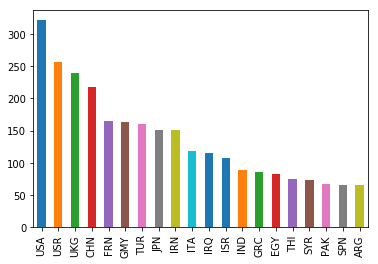

In [14]:
df.stabb.value_counts().head(20).plot(kind='bar')

### Zu welcher Zeit gab es am meisten Konflikte?

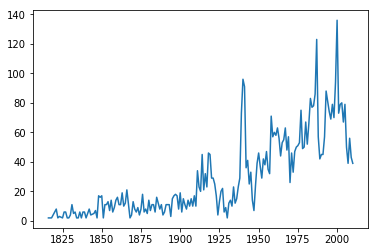

In [15]:
df.styear.value_counts().sort_index().plot()

### Um was für Konflikte handelt es sich?

In [16]:
hostlev_codes = pd.Series({
    0: "Unknown",
    1: "No militarized action",
    2: "Threat to use force",
    3: "Display of force",
    4: "Use of force",
    5: "War"
})

In [17]:
df_hostlev_codes = hostlev_codes.to_frame().rename(columns={0: "intensity"})

In [18]:
df.hostlev.value_counts().to_frame().join(df_hostlev_codes).sort_index()

,hostlev,intensity
0,1,Unknown
1,1341,No militarized action
2,216,Threat to use force
3,1266,Display of force
4,2366,Use of force
5,321,War


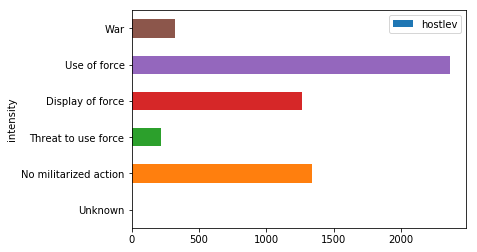

In [19]:
df.hostlev.value_counts().to_frame().join(df_hostlev_codes).sort_index().plot(kind='barh', y="hostlev", x="intensity")

Wichtig: mehrere Wege führen zum Ziel. Bsp oben, man könnte den Code auch anders schreiben...

## Wir wollen etwas mehr wissen

### Zeitdauer von verschiedenen Konflikttypen

In [20]:
#create one date field out of year/month/day for start and end date
df['stdate'] = df.styear.astype(str) + "/" + df.stmon.astype(str) + "/" + df.stday.astype(str)
df['enddate'] = df.endyear.astype(str) + "/" + df.endmon.astype(str) + "/" + df.endday.astype(str)

In [21]:
#oops, some days have "-9" in them (=unknown dates). replace them with 15 (best guess)
df['stdate'] = df.stdate.str.replace("-9","15")
df['enddate'] = df.enddate.str.replace("-9","15")

In [22]:
#convert to datetime
df['stdate'] = pd.to_datetime(df.stdate, format="%Y/%m/%d")
df['enddate'] = pd.to_datetime(df.enddate, format="%Y/%m/%d")

In [23]:
#new field for the time difference
df['timediff'] = df.enddate - df.stdate

In [24]:
#get back the days and months
df['timediff_days'] = df.timediff.dt.days

Text(0.5,1,'Anzahl der Konflikte nach Zeitdauer, in Tagen')

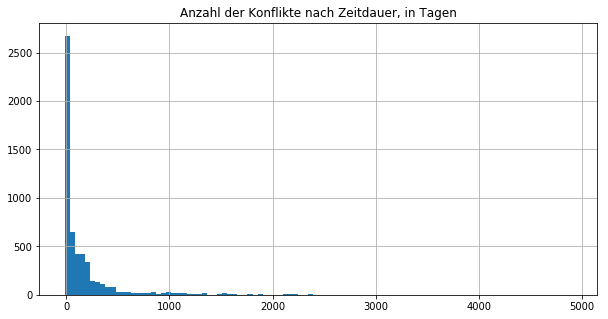

In [25]:
plt = df.timediff_days.hist(bins=100, figsize=(10,5))
plt.set_title("Anzahl der Konflikte nach Zeitdauer, in Tagen")

In [26]:
df.timediff.describe()

count                        5511
mean     172 days 05:25:18.780620
std      382 days 07:26:50.820520
min            -14 days +00:00:00
25%               0 days 00:00:00
50%              40 days 00:00:00
75%             182 days 00:00:00
max            4903 days 00:00:00
Name: timediff, dtype: object

### Welche Länder haben Konflikte angefangen?

In [27]:
#field 'orig' has 1 if country 'originated' the conlfict (whatever this means)
df.groupby('stabb')['orig'].mean().sort_values(ascending=False)

stabb
LBR    1.000000
CRO    1.000000
PAP    1.000000
PAR    1.000000
HAI    1.000000
PNG    1.000000
GUY    1.000000
PRK    1.000000
GRN    1.000000
GNB    1.000000
GHA    1.000000
GAM    1.000000
GAB    1.000000
RWA    1.000000
ERI    1.000000
EQG    1.000000
MAA    1.000000
DJI    1.000000
SIN    1.000000
PAN    1.000000
PAL    1.000000
IND    1.000000
MLI    1.000000
MAD    1.000000
MAG    1.000000
MAL    1.000000
MAW    1.000000
LEB    1.000000
LAO    1.000000
MLD    1.000000
         ...   
POL    0.666667
QAT    0.666667
BEL    0.636364
RUM    0.606061
LUX    0.600000
SIC    0.600000
OMA    0.545455
BAH    0.500000
MAC    0.500000
SLO    0.500000
NAM    0.500000
TUS    0.500000
HSE    0.500000
UAE    0.454545
SAX    0.400000
AUL    0.357143
HAN    0.250000
MEC    0.000000
MOD    0.000000
JAM    0.000000
NEW    0.000000
SVG    0.000000
HSG    0.000000
BAD    0.000000
BAR    0.000000
BAV    0.000000
WRT    0.000000
DMA    0.000000
SLU    0.000000
AAB    0.000000
Name: orig, Length

In [28]:
#look only at the 10 countries with most conflicts
top10 = df.stabb.value_counts().head(10).keys()

In [29]:
df[df.stabb.isin(top10)].groupby('stabb')['orig'].mean().sort_values(ascending=False)

stabb
IRN    0.986755
CHN    0.954128
JPN    0.953642
TUR    0.906832
USR    0.863281
GMY    0.846626
USA    0.831776
UKG    0.794979
ITA    0.764706
FRN    0.763636
Name: orig, dtype: float64

**Wer zur Hölle ist IRN?**

-> Die Auswertung ist nur so gut wie die Info, die in der Datenbank drin ist
-> Pandas selbst beantwortet in den seltensten Fällen alles

In [30]:
df_irn = df[df.stabb == 'IRN']
df_irn.head(3)

,dispnum3,dispnum4,stabb,ccode,stday,stmon,styear,endday,endmon,endyear,...,hostlev,orig,version,changes_1,changes_2,changes_3,stdate,enddate,timediff,timediff_days
8,8,-9,IRN,630,-9,7,1856,5,4,1857,...,5,1,4.2,1,2,0,1856-07-15,1857-04-05,264 days,264
36,20,-9,IRN,630,18,11,1945,9,5,1946,...,1,1,4.2,0,0,0,1945-11-18,1946-05-09,172 days,172
203,122,-9,IRN,630,29,6,1961,29,6,1961,...,1,0,4.2,0,0,0,1961-06-29,1961-06-29,0 days,0


IRN has country code 630
- could be Iran
- or Puerto Rico ??

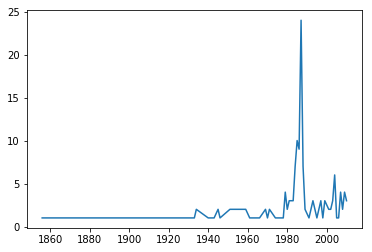

In [31]:
df_irn.styear.value_counts().sort_index().plot()

Looks like it is Iran after all...

### Was für Konflikte hat Iran geführt?

In [32]:
#We still have our hostlev_codes...
df_hostlev_codes

,intensity
0,Unknown
1,No militarized action
2,Threat to use force
3,Display of force
4,Use of force
5,War


In [33]:
df_irn.hostlev.value_counts().to_frame().join(df_hostlev_codes).sort_index()

,hostlev,intensity
1,21,No militarized action
2,3,Threat to use force
3,25,Display of force
4,100,Use of force
5,2,War


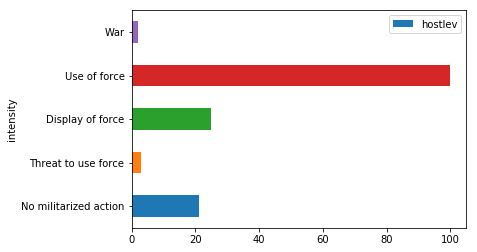

In [34]:
df_irn.hostlev.value_counts().to_frame().join(df_hostlev_codes).sort_index().plot(kind='barh', y="hostlev", x="intensity")

### Wie viele Tote gab es dabei?

In [35]:
fatality_codes = pd.Series({
    0: "None",
    1: "1-25 deaths",
    2: "26-100 deaths",
    3: "101-250 deaths",
    4: "251-500 deaths",
    5: "501-999 deaths",
    6: "More than 999 deaths",
    -9: "Unknown"
})

In [36]:
df_fatality_codes = fatality_codes.to_frame().rename(columns={0: "fatalities"})
df_fatality_codes

,fatalities
0,None
1,1-25 deaths
2,26-100 deaths
3,101-250 deaths
4,251-500 deaths
5,501-999 deaths
6,More than 999 deaths
-9,Unknown


In [37]:
df_irn_fatality = df_irn.fatality.value_counts().to_frame().rename(columns={'fatality': 'number'})
df_irn_fatality

,number
0,121
1,15
-9,11
6,2
2,2


In [38]:
df_irn_fatality.join(df_fatality_codes, how="outer").sort_index().fillna(0)

,number,fatalities
-9,11.0,Unknown
0,121.0,None
1,15.0,1-25 deaths
2,2.0,26-100 deaths
3,0.0,101-250 deaths
4,0.0,251-500 deaths
5,0.0,501-999 deaths
6,2.0,More than 999 deaths


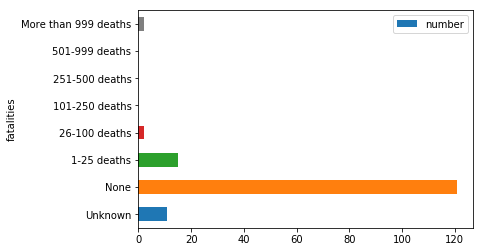

In [39]:
df_irn_fatality.join(df_fatality_codes, how="outer").sort_index().fillna(0).plot(kind='barh', y="number", x="fatalities")

Iran hat zwei Kriege mit über 999 Toten geführt, bei den meisten Konflikten gab es aber keine Toten.

## Daten exportieren und anderweitig verwenden

Sagen wir mal, wir schreiben gerade einen Artikel über die Geschichte der Kriege.
- Nehmen wir an, wir möchten die Grafik online mit 'infogram' weiterverbreiten
- Wir möchten für eine interaktive Web-Grafk aufzeigen, welche Länder in wie viele Kriege verwickelt waren
- Uns interessieren die 10 Länder, die am häufigsten in den Hostility Kategorien 4 und 5 drin waren
- Wir wollen das 19. und das 20. Jahrhundert separat anschauen

### Daten vorbereiten

In [40]:
# Select only level 4 and 5 types
df_45 = df[df.hostlev.isin([4, 5])]

In [41]:
# Which are the top 10 countries?
top10 = df_45.stabb.value_counts().head(10).keys()
top10

Index(['USR', 'USA', 'CHN', 'IRN', 'UKG', 'GMY', 'FRN', 'IRQ', 'ISR', 'TUR'], dtype='object')

In [43]:
# Select only the top 10 countries
df_45_top10 = df_45[df.stabb.isin(top10)].copy()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [44]:
# Create a boolean column if a conflict was in the 19th century
df_45_top10['19th'] = df_45_top10.styear < 1901
df_45_top10.head(3)

,dispnum3,dispnum4,stabb,ccode,stday,stmon,styear,endday,endmon,endyear,...,orig,version,changes_1,changes_2,changes_3,stdate,enddate,timediff,timediff_days,19th
6,7,-9,UKG,200,13,10,1951,26,1,1952,...,1,4.2,0,0,0,1951-10-13,1952-01-26,105 days,105,False
8,8,-9,IRN,630,-9,7,1856,5,4,1857,...,1,4.2,1,2,0,1856-07-15,1857-04-05,264 days,264,True
9,8,-9,UKG,200,-9,7,1856,5,4,1857,...,1,4.2,1,2,0,1856-07-15,1857-04-05,264 days,264,True


In [45]:
# Create another boolean column if the conflict wasnt in the 19th
df_45_top10['20th'] = ~df_45_top10['19th']

In [46]:
# Transform the boolean columns to integers
df_45_top10['c19th'] = df_45_top10['19th'].astype(int)
df_45_top10['c20th'] = df_45_top10['20th'].astype(int)
df_45_top10.head(3)

,dispnum3,dispnum4,stabb,ccode,stday,stmon,styear,endday,endmon,endyear,...,changes_2,changes_3,stdate,enddate,timediff,timediff_days,19th,20th,c19th,c20th
6,7,-9,UKG,200,13,10,1951,26,1,1952,...,0,0,1951-10-13,1952-01-26,105 days,105,False,True,0,1
8,8,-9,IRN,630,-9,7,1856,5,4,1857,...,2,0,1856-07-15,1857-04-05,264 days,264,True,False,1,0
9,8,-9,UKG,200,-9,7,1856,5,4,1857,...,2,0,1856-07-15,1857-04-05,264 days,264,True,False,1,0


In [47]:
# Group by country and sum up the integer columns for both centuries, sort
df_chart = df_45_top10.groupby('stabb')[['19th', '20th']].sum().astype(int).reset_index().sort_values('19th', ascending=False)
df_chart

,stabb,19th,20th
7,UKG,29,72
1,FRN,23,50
8,USA,16,92
9,USR,14,110
2,GMY,12,64
6,TUR,12,53
0,CHN,8,96
3,IRN,1,101
4,IRQ,0,71
5,ISR,0,71


### Daten exportieren

In [48]:
df_chart.to_csv('war-chart.csv', index=False)

### Das steht in unserem csv-File:

In [49]:
with open('war-chart.csv', "r") as f:
    file_content = f.read()

In [50]:
print(file_content)

stabb,19th,20th
UKG,29,72
FRN,23,50
USA,16,92
USR,14,110
GMY,12,64
TUR,12,53
CHN,8,96
IRN,1,101
IRQ,0,71
ISR,0,71



### Online-Chart basteln

Go to http://infogram.com

Paste the csv data...

Results: https://infogram.com/top-10-war-countries-1h0n25ger7jz6pe?live